In [2]:
# Dependencies and Setup
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
from datetime import date
import sqlite3

# Reflect Tables into SQLAlchemy ORM

In [3]:
# From the SQLAlchemy library, import specific modules
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import desc

In [4]:
# Path to sqlite database file
database_path = "data/hawaii.sqlite"

In [5]:
f"sqlite:///{database_path}"

'sqlite:///data/hawaii.sqlite'

In [6]:
# Create an engine (opens the 'door' into memory)
engine = create_engine(f"sqlite:///{database_path}")

In [7]:
# Reflect the tables into classes using automap_base()
Base = automap_base()
# Reflect the tables with Base.prepare(), passing in the engine and reflect=True
Base.prepare(engine, reflect = True)

In [8]:
# Create a Session object (the thing that keeps track on what I am doing)
session = Session(bind=engine)

In [9]:
# We can view all of the classes that automap found with Base.classes
Base.classes.keys()

['measurement', 'station']

In [10]:
# Create a variable for each Classes (!Dataframes and Series = Classes need to be proper case)
HawaiiMeasurement = Base.classes.measurement
HawaiiStation = Base.classes.station

# Exploratory Climate Analysis

##### Design a query to retrieve the last 12 months of precipitation data

In [11]:
# Create a new connection object = session
# connection = engine.connect()

In [12]:
# Print all results 
#result_set = session.execute("SELECT * FROM hawaii")

In [13]:
# Calculate the date 1 year ago from the last data point in the database
# Use the datetime.timedelta() function to help calculating the difference of one year, 12 months, or 365 days
last_data = date.fromisoformat('2017-08-23') #HawaiiMeasurement[-1]
last_data

datetime.date(2017, 8, 23)

In [14]:
last_year = last_data - timedelta(days = 365)
last_year

datetime.date(2016, 8, 23)

In [15]:
# Use session.query() to retrieve the date and prcp columns, .filter() by the date you calculated above, and selecting .all() results
hm_date_prcp = session.query(HawaiiMeasurement.date, HawaiiMeasurement.prcp).filter(HawaiiMeasurement.date >= last_year).all()
hm_date_prcp

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [16]:
# Save the query results as a Pandas DataFrame() 
hm_date_prcp_df = pd.DataFrame(hm_date_prcp)
hm_date_prcp_df

,date,prcp
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00
...,...,...
2225,2017-08-19,0.09
2226,2017-08-20,NaN
2227,2017-08-21,0.56
2228,2017-08-22,0.50


In [17]:
# Set the index to the date column
hm_date_prcp_df.set_index(hm_date_prcp_df['date'])

,date,prcp
date,,
2016-08-23,2016-08-23,0.00
2016-08-24,2016-08-24,0.08
2016-08-25,2016-08-25,0.08
2016-08-26,2016-08-26,0.00
2016-08-27,2016-08-27,0.00
...,...,...
2017-08-19,2017-08-19,0.09
2017-08-20,2017-08-20,NaN
2017-08-21,2017-08-21,0.56


In [18]:
# Sort the dataframe by date
sort_bydate_df = hm_date_prcp_df.sort_values("date")
sort_bydate_df

,date,prcp
0,2016-08-23,0.00
1009,2016-08-23,NaN
1529,2016-08-23,1.79
704,2016-08-23,0.05
361,2016-08-23,0.15
...,...,...
1527,2017-08-22,0.00
1008,2017-08-23,0.00
360,2017-08-23,0.00
1528,2017-08-23,0.08


Text(0, 0.5, 'prcp')

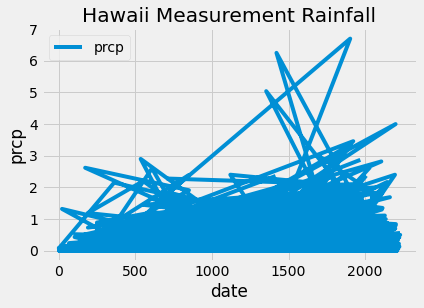

In [19]:
# Use Pandas Plotting with Matplotlib to plot the data
sort_bydate_df.plot()
plt.title("Hawaii Measurement Rainfall")
plt.xlabel("date")
plt.ylabel("prcp")

In [20]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_stat = sort_bydate_df.describe()
summary_stat

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [21]:
summary_stat_f = summary_stat['prcp'].map('{:,.2f}'.format)
pd.DataFrame(summary_stat_f)

,prcp
count,"2,021.00"
mean,0.18
std,0.46
min,0.00
25%,0.00
50%,0.02
75%,0.13
max,6.70


## Query station information

In [42]:
# Total number of stations
total_number_of_stations = (session.query(func.count(HawaiiStation.station)).all())
total_number_of_stations

[(9)]

In [160]:
# list the stations and ovservation counts in descending order
# desc_expression = sqlalchemy.sql.expression.desc()
# order_by_query = query.order_by(desc_expression)
# session.query(func.count(Station.station)).all()
list_of_stations = (session
                    .query(HawaiiMeasurement.station, func.count(HawaiiMeasurement.station))
                    .group_by(HawaiiMeasurement.station)
                    .order_by(func.count(HawaiiMeasurement.station).desc())
                    .all())
list_of_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [140]:
# most active station is ... 
list_of_stations[0]

('USC00519281', 2772)

In [136]:
# which stations has the highest number of observations use: func.min, func.max, func.avg, and func.count
min_of_stations = (session
                    .query(HawaiiMeasurement.station,
                        func.min(HawaiiMeasurement.tobs))
                    .all())
min_of_stations

[('USC00511918', 53.0)]

In [137]:
max_of_stations = (session
                    .query(HawaiiMeasurement.station,
                        func.max(HawaiiMeasurement.tobs))
                    .all())
max_of_stations

[('USC00519397', 87.0)]

In [159]:
avg_of_stations = (session
                    .query(HawaiiMeasurement.station,
                        func.avg(HawaiiMeasurement.tobs))
                    .all())
avg_of_stations

[('USC00519397', 73.09795396419437)]

In [158]:
# but for the most active station it is:
active_stat = (session
                    .query(HawaiiMeasurement.station,
                        func.avg(HawaiiMeasurement.tobs)
                          , func.max(HawaiiMeasurement.tobs)
                          , func.min(HawaiiMeasurement.tobs))
                   .filter(HawaiiMeasurement.station == 'USC00519281')
                    .all())
active_stat

[('USC00519281', 71.66378066378067, 85.0, 54.0)]

In [190]:
# Retrieve USC00519281 station in the last 12 months 
highest_tob = (session
               .query(HawaiiMeasurement.date
                      , HawaiiMeasurement.station
                      , HawaiiMeasurement.tobs)
               .filter(HawaiiMeasurement.station == 'USC00519281')
               .filter(HawaiiMeasurement.date >= last_year)
               .all())
highest_tob

[('2016-08-23', 'USC00519281', 77.0),
 ('2016-08-24', 'USC00519281', 77.0),
 ('2016-08-25', 'USC00519281', 80.0),
 ('2016-08-26', 'USC00519281', 80.0),
 ('2016-08-27', 'USC00519281', 75.0),
 ('2016-08-28', 'USC00519281', 73.0),
 ('2016-08-29', 'USC00519281', 78.0),
 ('2016-08-30', 'USC00519281', 77.0),
 ('2016-08-31', 'USC00519281', 78.0),
 ('2016-09-01', 'USC00519281', 80.0),
 ('2016-09-02', 'USC00519281', 80.0),
 ('2016-09-03', 'USC00519281', 78.0),
 ('2016-09-04', 'USC00519281', 78.0),
 ('2016-09-05', 'USC00519281', 78.0),
 ('2016-09-06', 'USC00519281', 73.0),
 ('2016-09-07', 'USC00519281', 74.0),
 ('2016-09-08', 'USC00519281', 80.0),
 ('2016-09-09', 'USC00519281', 79.0),
 ('2016-09-10', 'USC00519281', 77.0),
 ('2016-09-11', 'USC00519281', 80.0),
 ('2016-09-12', 'USC00519281', 76.0),
 ('2016-09-13', 'USC00519281', 79.0),
 ('2016-09-14', 'USC00519281', 75.0),
 ('2016-09-15', 'USC00519281', 79.0),
 ('2016-09-16', 'USC00519281', 78.0),
 ('2016-09-17', 'USC00519281', 79.0),
 ('2016-09-1

In [191]:
highest_tob_df = pd.DataFrame(highest_tob)
highest_tob_df

,date,station,tobs
0,2016-08-23,USC00519281,77.0
1,2016-08-24,USC00519281,77.0
2,2016-08-25,USC00519281,80.0
3,2016-08-26,USC00519281,80.0
4,2016-08-27,USC00519281,75.0
...,...,...,...
347,2017-08-14,USC00519281,77.0
348,2017-08-15,USC00519281,77.0
349,2017-08-16,USC00519281,76.0
350,2017-08-17,USC00519281,76.0


In [193]:

for tobs in highest_tob: 
    print(tobs)

('2016-08-23', 'USC00519281', 77.0)
('2016-08-24', 'USC00519281', 77.0)
('2016-08-25', 'USC00519281', 80.0)
('2016-08-26', 'USC00519281', 80.0)
('2016-08-27', 'USC00519281', 75.0)
('2016-08-28', 'USC00519281', 73.0)
('2016-08-29', 'USC00519281', 78.0)
('2016-08-30', 'USC00519281', 77.0)
('2016-08-31', 'USC00519281', 78.0)
('2016-09-01', 'USC00519281', 80.0)
('2016-09-02', 'USC00519281', 80.0)
('2016-09-03', 'USC00519281', 78.0)
('2016-09-04', 'USC00519281', 78.0)
('2016-09-05', 'USC00519281', 78.0)
('2016-09-06', 'USC00519281', 73.0)
('2016-09-07', 'USC00519281', 74.0)
('2016-09-08', 'USC00519281', 80.0)
('2016-09-09', 'USC00519281', 79.0)
('2016-09-10', 'USC00519281', 77.0)
('2016-09-11', 'USC00519281', 80.0)
('2016-09-12', 'USC00519281', 76.0)
('2016-09-13', 'USC00519281', 79.0)
('2016-09-14', 'USC00519281', 75.0)
('2016-09-15', 'USC00519281', 79.0)
('2016-09-16', 'USC00519281', 78.0)
('2016-09-17', 'USC00519281', 79.0)
('2016-09-18', 'USC00519281', 78.0)
('2016-09-19', 'USC00519281'

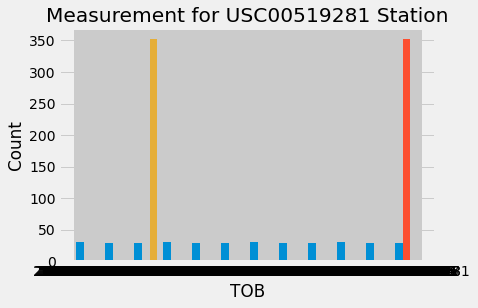

In [187]:
# Plot the resutls as a histogram with bins=12
plt.hist(highest_tob_df,bins=12)
plt.title("Measurement for USC00519281 Station")
plt.xlabel("TOB")
plt.ylabel("Count")
plt.show()